In [0]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import datetime
from functools import partial

In [10]:
data = pd.read_csv('https://www.aspiration.ai/machine-learning/internship/Downloads/stocks/LT.csv')
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89


In [14]:
filtered_data = data[data.Series == 'EQ']
filtered_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89


In [15]:
filtered_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [16]:

filtered_data.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.0,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.0,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.6,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.1,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89
493,LT,EQ,13-May-2019,1355.50,1345.00,1355.00,1312.0,1318.20,1317.65,1326.93,3422913,4.541968e+09,126334,1686523,49.27


In [17]:
filtered_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000
mean,1333.803644,1334.528846,1347.292915,1320.419939,1332.970142,1332.947470,1334.006579,2.309829e+06,3.057544e+09,80733.639676,1.288091e+06,55.459352
std,148.941004,148.383524,149.412145,146.549082,147.629620,147.809173,147.854453,1.381153e+06,1.822511e+09,39185.233377,7.888038e+05,8.703728
min,1117.600000,1120.000000,1126.100000,1113.050000,1118.500000,1117.600000,1120.930000,2.164900e+05,3.023464e+08,6451.000000,1.196130e+05,31.490000
25%,1235.062500,1235.612500,1248.625000,1219.650000,1235.200000,1235.062500,1236.727500,1.471996e+06,1.986064e+09,55263.750000,7.751348e+05,49.860000
50%,1318.250000,1317.950000,1334.775000,1308.000000,1318.975000,1318.025000,1320.680000,1.966720e+06,2.588930e+09,74533.500000,1.101308e+06,55.465000
75%,1371.525000,1373.537500,1386.950000,1360.075000,1371.762500,1371.312500,1373.330000,2.609982e+06,3.535087e+09,93659.500000,1.490642e+06,61.342500
max,1804.900000,1816.000000,1833.950000,1783.500000,1804.350000,1804.900000,1802.250000,1.122784e+07,1.471906e+10,317866.000000,7.378074e+06,79.150000


In [18]:
filtered_data.tail(90)['Close Price'].max()

1441.9

In [19]:
filtered_data.tail(90)['Close Price'].min()

1216.65

In [20]:
filtered_data.tail(90)['Close Price'].mean()

1339.8688888888885

In [21]:
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data['Date'].dtype

dtype('<M8[ns]')

In [22]:
filtered_data['Date'].max()-filtered_data['Date'].min()


Timedelta('728 days 00:00:00')

In [23]:
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['VWAP'] = (data['Close Price'] * data['Total Traded Quantity']).cumsum() / data['Total Traded Quantity'].fillna(0).cumsum()
data_vwap = data[['Month','Year','VWAP']]
group = data_vwap.groupby(['Month','Year'])
group.first()

VWAP
Month Year             
1     2018  1304.498551
      2019  1320.019432
2     2018  1316.817413
      2019  1320.649426
3     2018  1318.742032
      2019  1317.467404
4     2018  1316.047454
      2019  1320.664603
5     2017  1742.400000
      2018  1319.106274
      2019  1322.493637
6     2017  1757.672579
      2018  1322.336568
7     2017  1747.837681
      2018  1320.789454
8     2017  1551.895340
      2018  1318.480134
9     2017  1449.349943
      2018  1318.677904
10    2017  1376.764104
      2018  1318.530114
11    2017  1340.941845
      2018  1312.542263
12    2017  1317.650673
      2018  1316.221853

In [24]:
def avg_price(N):
    return (data['Average Price'].tail(N).sum())/N
print("Average prices for last N days are as follows:")
print("Last 1 week",avg_price(5))
print("Last 2 weeks",avg_price(10))
print("Last 1 month",avg_price(20))
print("Last 3 months",avg_price(60))
print("Last 6 months",avg_price(120))
print("Last 1 year",avg_price(240))
print("Profit/Loss % for N days are as follows:")
def prof_loss(N):
    difference = (data['Close Price'].tail(N).iloc[N-1] - data['Close Price'].tail(N).iloc[0])
    if difference < 0 :
        loss = -(difference)
        loss_percen = (loss/data['Close Price'].tail(N).iloc[N-1])*100
        return loss_percen
    if difference > 0 :
        profit = difference
        profit_percen = (profit/data['Close Price'].tail(N).iloc[N-1])*100
        return profit_percen
print("Loss/Profit percentage for last N days are as follows:")
print("Last 1 week",prof_loss(5))
print("Last 2 weeks",prof_loss(10))
print("Last 1 month",prof_loss(20))
print("Last 3 months",prof_loss(60))
print("Last 6 months",prof_loss(120))
print("Last 1 year",prof_loss(240))

Average prices for last N days are as follows:
Last 1 week 1353.726
Last 2 weeks 1356.383
Last 1 month 1361.2910000000002
Last 3 months 1341.818
Last 6 months 1359.6889999999999
Last 1 year 1331.7889166666666
Profit/Loss % for N days are as follows:
Loss/Profit percentage for last N days are as follows:
Last 1 week 3.7149470648502874
Last 2 weeks 3.077448487838193
Last 1 month 4.090615869160995
Last 3 months 5.399764732668014
Last 6 months 6.135923803741502
Last 1 year 0.18973171934884073


In [25]:
data['Day_Perc_Change'] = data['Close Price'].pct_change().fillna(0)
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,5,2017,1742.400000,0.000000
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,5,2017,1741.413203,-0.000976
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,5,2017,1747.976365,0.008474
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,5,2017,1740.690629,-0.018713
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,5,2017,1736.946183,0.001132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,5,2019,1322.680227,0.010276
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,5,2019,1322.733448,-0.004573
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,5,2019,1322.806581,-0.002867
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,5,2019,1322.848716,-0.000700


In [26]:
if ((data['Day_Perc_Change'] >= -0.5) & (data['Day_Perc_Change'] <= 0.5)).all():
    data['Trend'] = 'Slight or No change'
if ((data['Day_Perc_Change'] >= 0.5) & (data['Day_Perc_Change'] <= 1)).all():
    data['Trend'] = 'Slight positive'
if ((data['Day_Perc_Change'] <= -0.5) & (data['Day_Perc_Change'] >= -1)).all():
    data['Trend'] = 'Slight negative'
if ((data['Day_Perc_Change'] >= 1) & (data['Day_Perc_Change'] <= 3)).all():
    data['Trend'] = 'Positive' 
if ((data['Day_Perc_Change'] <= -1) & (data['Day_Perc_Change'] >= -3)).all():
    data['Trend'] = 'Negative'
if ((data['Day_Perc_Change'] >= 3) & (data['Day_Perc_Change'] <= 7)).all():
    data['Trend'] = 'Among top gainers'
if ((data['Day_Perc_Change'] <= -3) & (data['Day_Perc_Change'] >= -7)).all():
    data['Trend'] = 'Among top losers'
if (data['Day_Perc_Change'] > 7).all():
    data['Trend'] = 'Bull run' 
if (data['Day_Perc_Change'] < -7).all():
    data['Trend'] = 'Bear drop' 
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,5,2017,1742.400000,0.000000,Slight or No change
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,5,2017,1741.413203,-0.000976,Slight or No change
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,5,2017,1747.976365,0.008474,Slight or No change
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,5,2017,1740.690629,-0.018713,Slight or No change
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,5,2017,1736.946183,0.001132,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,5,2019,1322.680227,0.010276,Slight or No change
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,5,2019,1322.733448,-0.004573,Slight or No change
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,5,2019,1322.806581,-0.002867,Slight or No change
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89,5,2019,1322.848716,-0.000700,Slight or No change


In [27]:
data.groupby(data.Trend).mean()['Total Traded Quantity']
data.groupby(data.Trend).median()['Total Traded Quantity']

Trend
Slight or No change    1966719.5
Name: Total Traded Quantity, dtype: float64

In [0]:
data.to_csv('Module1Solutions.csv')

In [39]:
import pandas as pd
from datetime import datetime
from functools import partial


data = pd.read_csv("Module1Solutions.csv")
del data['Unnamed: 0']
duplicate_data = data 
data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,5,2017,1742.400000,0.000000,Slight or No change
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,5,2017,1741.413203,-0.000976,Slight or No change
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,5,2017,1747.976365,0.008474,Slight or No change
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,5,2017,1740.690629,-0.018713,Slight or No change
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,5,2017,1736.946183,0.001132,Slight or No change


In [30]:
data.Date.dtype

dtype('O')

In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data.Date.dtype

dtype('<M8[ns]')

In [32]:
data.set_index('Date', inplace = True)
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,LT,EQ,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41,5,2017,1742.400000,0.000000,Slight or No change
2017-05-16,LT,EQ,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12,5,2017,1741.413203,-0.000976,Slight or No change
2017-05-17,LT,EQ,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78,5,2017,1747.976365,0.008474,Slight or No change
2017-05-18,LT,EQ,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73,5,2017,1740.690629,-0.018713,Slight or No change
2017-05-19,LT,EQ,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45,5,2017,1736.946183,0.001132,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,LT,EQ,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55,5,2019,1322.680227,0.010276,Slight or No change
2019-05-08,LT,EQ,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87,5,2019,1322.733448,-0.004573,Slight or No change
2019-05-09,LT,EQ,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30,5,2019,1322.806581,-0.002867,Slight or No change


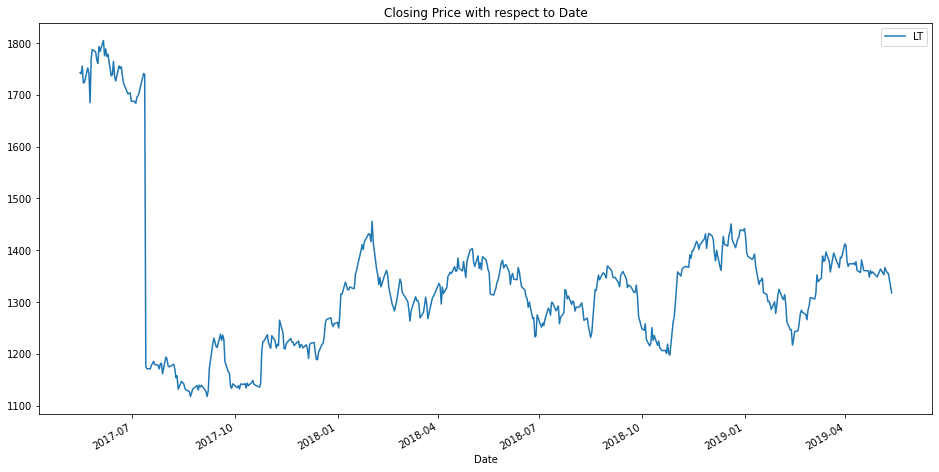

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Close Price'].plot(label = 'LT',figsize=(16,8),title='Closing Price with respect to Date')
plt.legend()

In [35]:
data['Close Price'].diff().abs().sort_values(ascending = False)

Date
2017-07-13    564.45
2017-05-25     84.40
2018-08-20     83.55
2018-10-29     63.85
2017-10-25     61.65
               ...  
2018-01-11      0.20
2019-04-08      0.15
2017-11-22      0.05
2017-07-17      0.05
2017-05-15       NaN
Name: Close Price, Length: 494, dtype: float64

In [36]:
import bs4
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests 
# more than 1 news is available for a single date so using different related variables
url_2018_10_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1103-cholamandalam-securities-3064341.html'
r = requests.get(url_2018_10_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("Printing news for only 4 dates since the 5th date has no news")
print("Obtaining news from Money Control")
print("News for 2018-10-19")
print("Only 1 news is available on this date")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_07_19 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1115-hdfc-securities-2734761.html'
r = requests.get(url_2018_07_19) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_07_19")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_04_20 = 'https://www.moneycontrol.com/news/business/stocks/buy-mindtree-target-of-rs-1000-reliance-securities-2553515.html'
r = requests.get(url_2018_04_20) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_04_20")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

url_2018_02_23 = 'https://www.moneycontrol.com/news/business/buy-mindtree-pidilite-industries-sell-upl-tata-steel-tata-motors-sudarshan-sukhani-2513371.html'
r = requests.get(url_2018_02_23) 
#print(r.content) 
soup = BeautifulSoup(r.content,"html.parser")
stock_news_title_container = soup.find('div',class_ = 'article_box')
stock_news_subhead_container = soup.find('div',class_ = 'brk_wraper clearfix')
stock_news_body_container = soup.find('div',class_ = 'arti-flow')
print("News for 2018_02_23")
print('\n')
print("Title:")
print (stock_news_title_container.h1.text)
print('\n')
print("Subject:")
print (stock_news_subhead_container.h2.text)
print('\n')
print("Report:")
print (stock_news_body_container.select_one("p:nth-of-type(2)").text)

print("-------------------------------------------------------------")

Printing news for only 4 dates since the 5th date has no news
Obtaining news from Money Control
News for 2018-10-19
Only 1 news is available on this date


Title:
Buy Mindtree; target of Rs 1103: Cholamandalam Securities


Subject:
Cholamandalam Securities is bullish on Mindtree has recommended buy rating on the stock with a target price of Rs 1103 in its research report dated October 19, 2018.


Report:
In 2QFY19, Mindtree’s revenue grew by 7.1% QoQ to INR 17.5bn in line with our expectations of INR 17.6bn largely driven by volume (+6.3% QoQ) and INR depreciation. In USD terms, revenues grew by 2% QoQ. In constant currency terms, revenue grew by 2.4% QoQ. Revenue from Digital business grew by 3.3% QoQ contributing 48.1% to total revenues. EBITDA grew by 16.8% QoQ to INR 2.7bn in-line with our expectations. EBITDA margin expanded by 130bps QoQ to 15.4%. EBITDA margin expanded on account of rupee depreciation (+130 bps) and presence of one off cost in the base quarter (+60bps) which was

<StemContainer object of 3 artists>

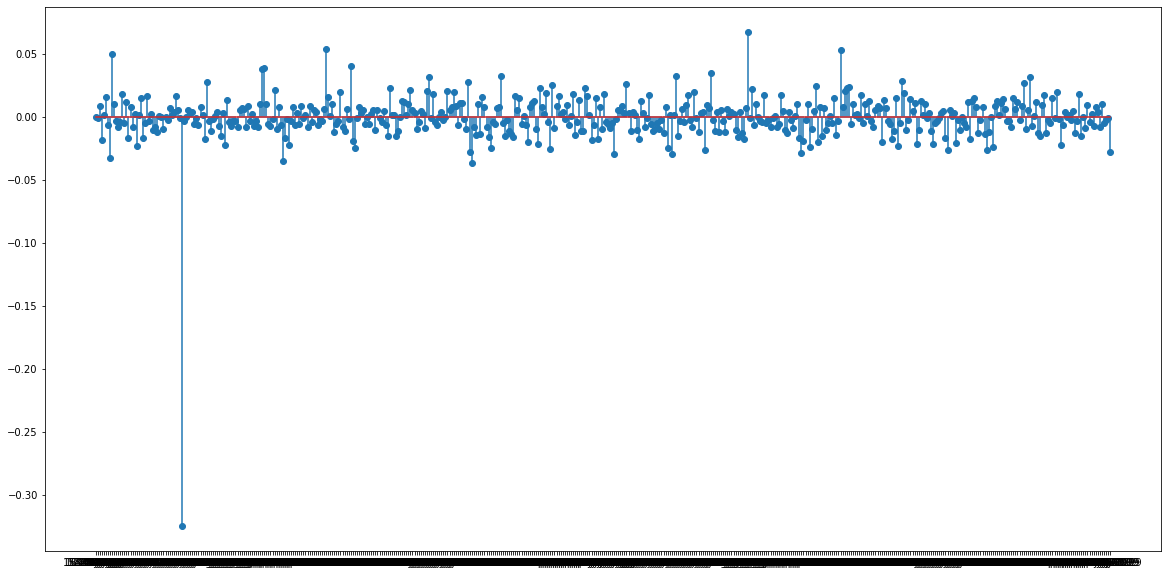

In [41]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])

<StemContainer object of 3 artists>

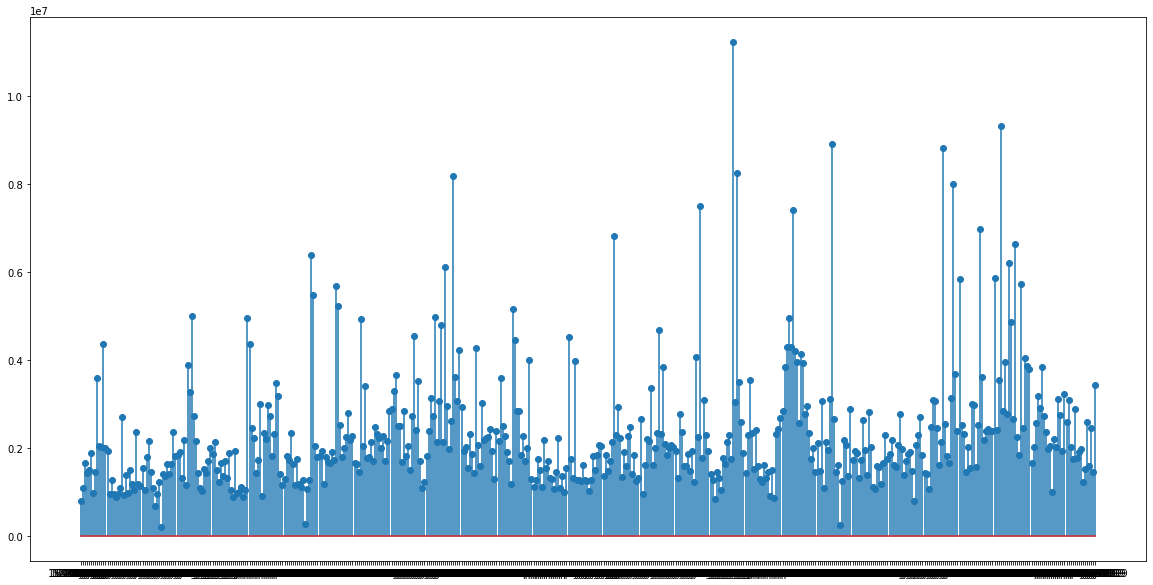

In [40]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])

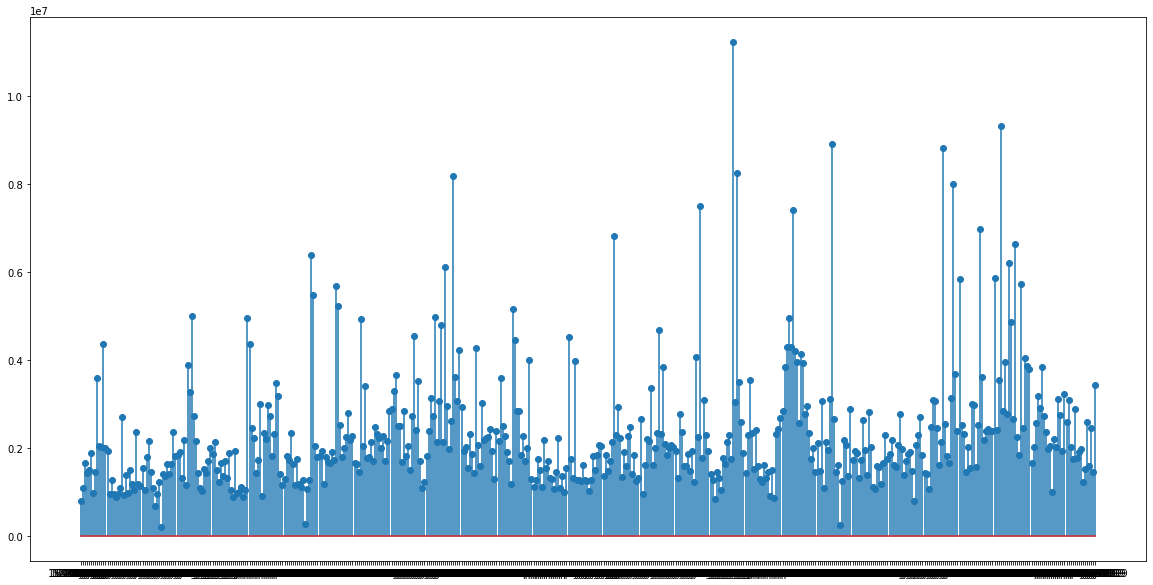

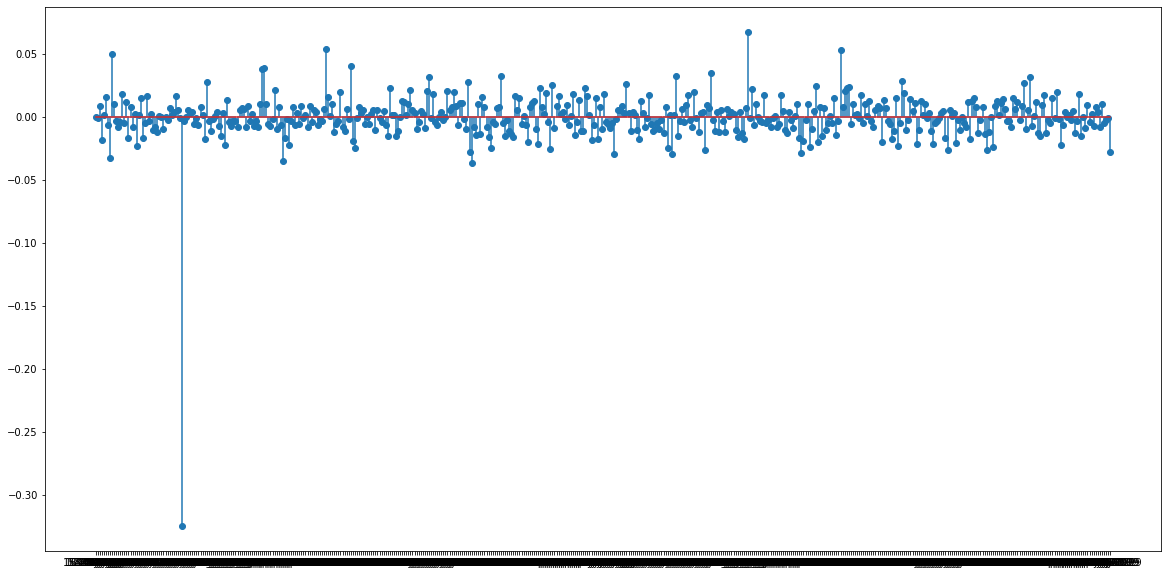

In [42]:
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data.Date,data['Day_Perc_Change'])
plt.show()

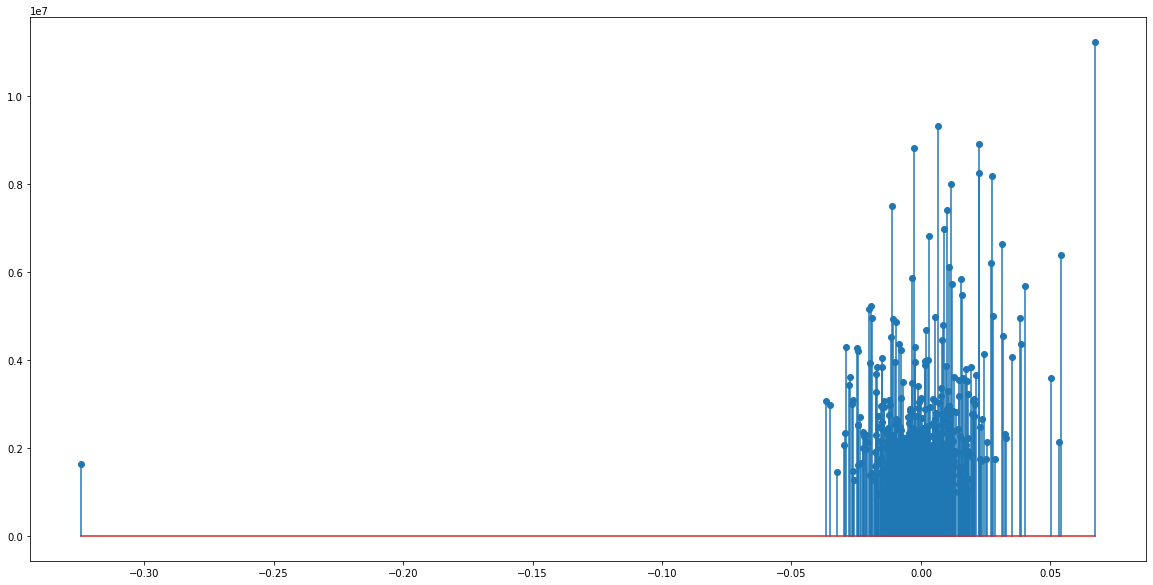

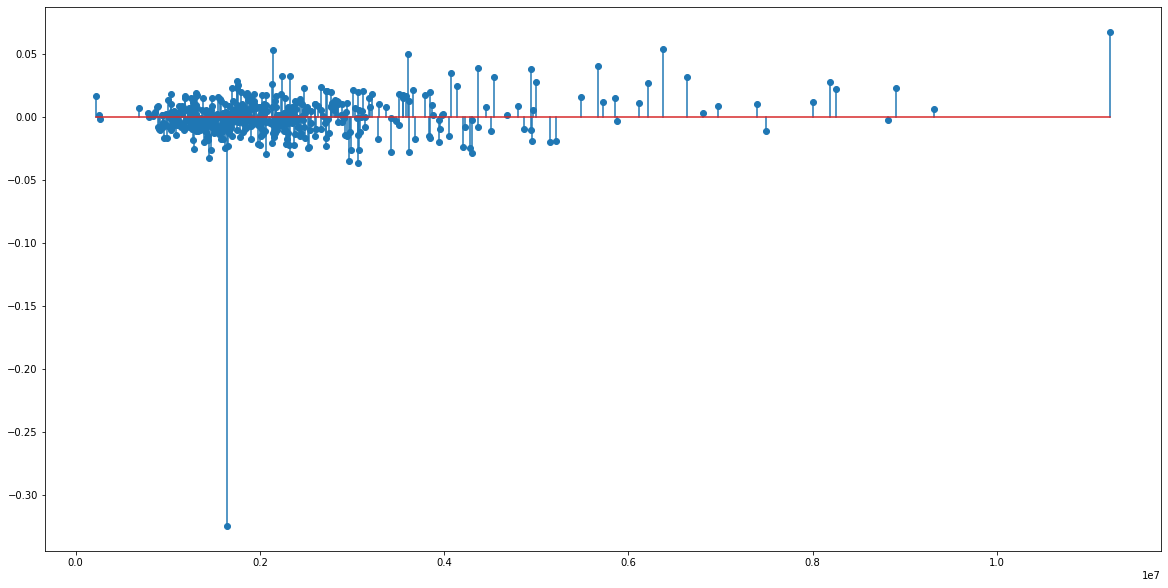

In [43]:
plt.figure(figsize=(20,10))
plt.stem(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.stem(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

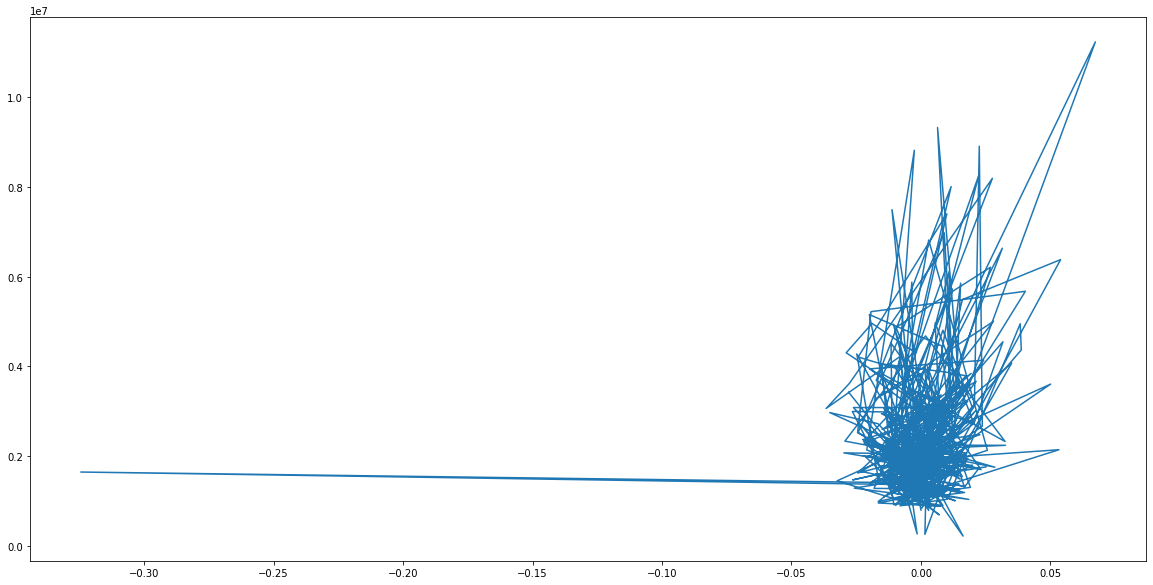

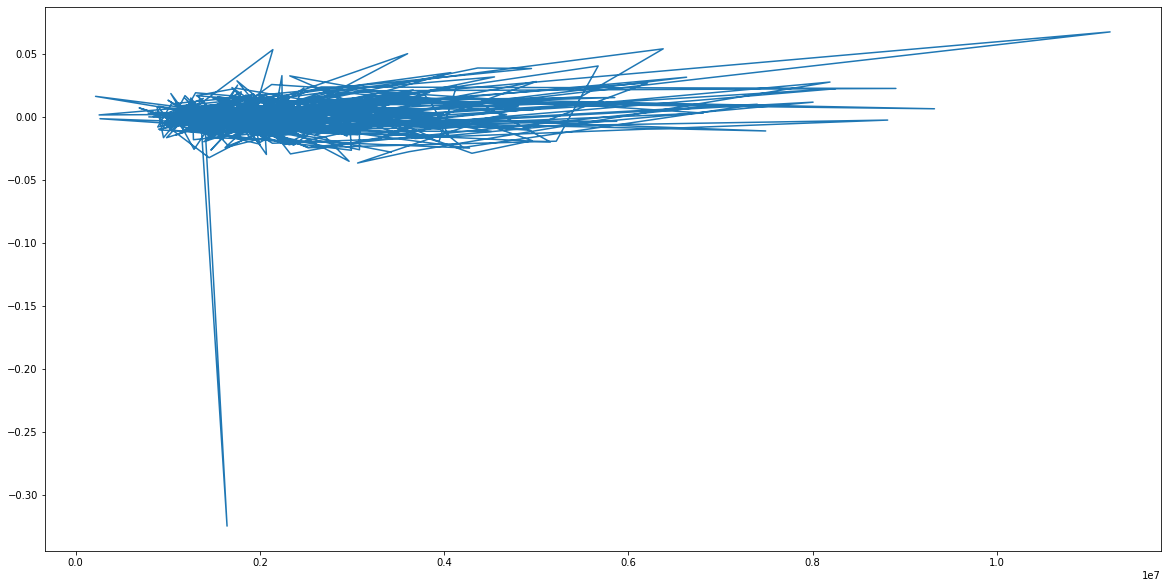

In [44]:
plt.figure(figsize=(20,10))
plt.plot(data['Day_Perc_Change'],data['Total Traded Quantity'])
plt.show()
plt.figure(figsize=(20,10))
plt.plot(data['Total Traded Quantity'],data['Day_Perc_Change'])
plt.show()

In [45]:
import matplotlib.pyplot as plt
from collections import Counter

Trendsare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = data['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

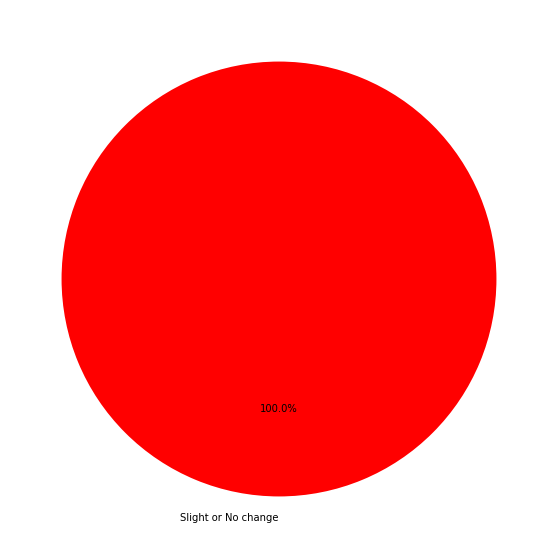

In [46]:
counter = [494]
labels= ['Slight or No change']
colors = ['r']
plt.figure(figsize=(20,10))
plt.pie(counter, labels=labels,colors=colors,startangle=90, autopct='%.1f%%')
plt.show()

In [47]:
import matplotlib.pyplot as plt

gk = data.groupby(['Trend'])['Total Traded Quantity']
gk.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,2.309829e+06,1.381153e+06,216490.0,1471996.25,1966719.5,2609982.5,11227838.0


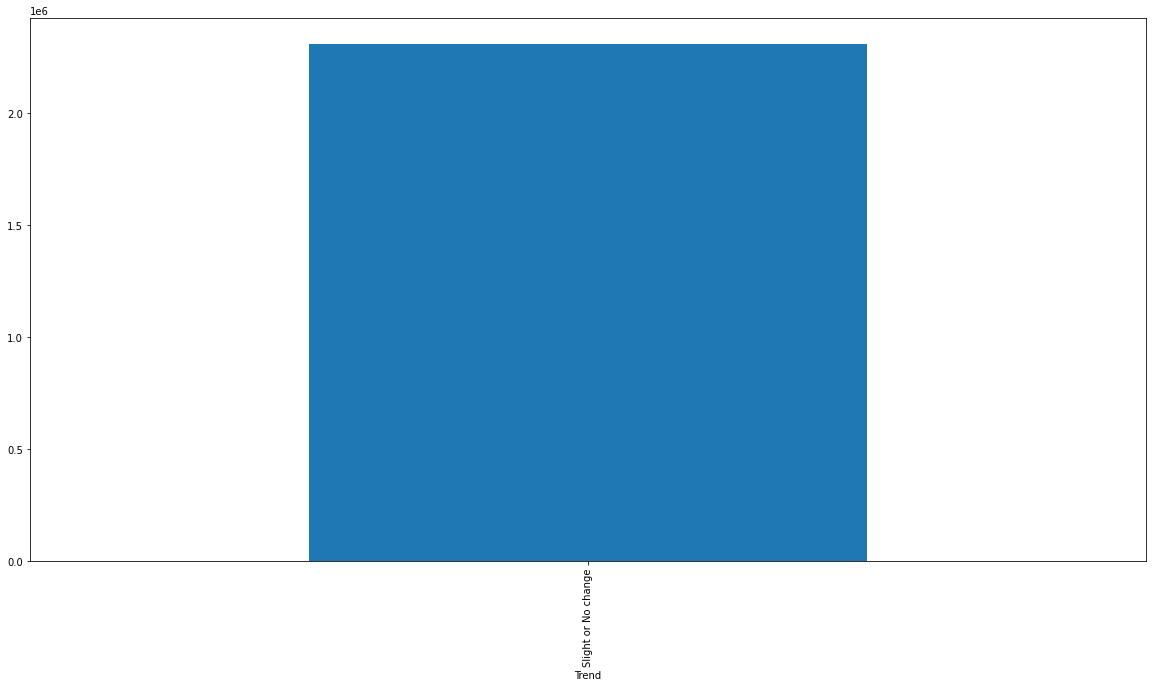

In [48]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

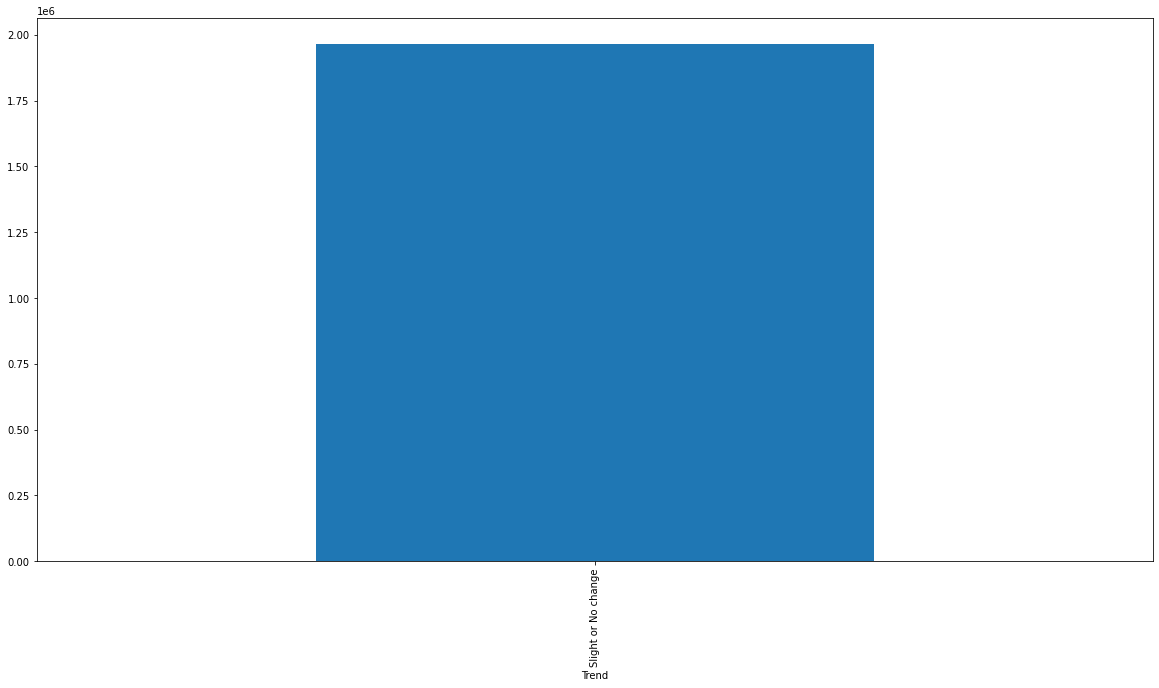

In [49]:
plt.figure(figsize=(20,10))
data.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

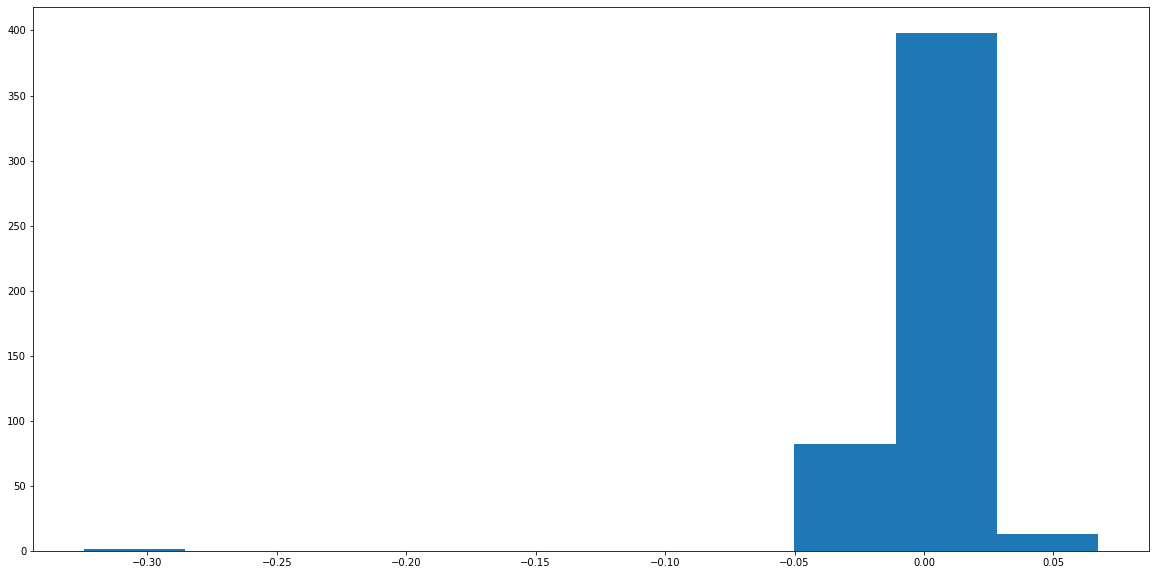

In [50]:
plt.figure(figsize=(20,10))
plt.hist(data['Day_Perc_Change'])
plt.show()

In [55]:
import pandas as pd
LT_data = pd.read_csv('LT.csv')
tcs_data = pd.read_csv('TCS.csv')
itc_data = pd.read_csv('ITC.csv')
PVR_data = pd.read_csv('PVR.csv')
VOLTAS_data = pd.read_csv('VOLTAS.csv')
LT_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89


In [56]:
tcs_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [58]:
itc_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,ITC,EQ,07-May-2019,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
492,ITC,EQ,08-May-2019,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
493,ITC,EQ,09-May-2019,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35
494,ITC,EQ,10-May-2019,299.85,300.00,300.45,296.90,297.15,297.75,298.68,6904657,2.062297e+09,132469,4024203,58.28


In [59]:
PVR_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,PVR,EQ,07-May-2019,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23
491,PVR,EQ,08-May-2019,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91
492,PVR,EQ,09-May-2019,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52
493,PVR,EQ,10-May-2019,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01


In [60]:
VOLTAS_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77


In [61]:
filter_LT = LT_data[LT_data.Series == 'EQ']
filter_LT

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,LT,EQ,07-May-2019,1352.70,1357.40,1374.35,1350.00,1368.50,1366.60,1366.49,2596385,3.547930e+09,80814,1727865,66.55
490,LT,EQ,08-May-2019,1366.60,1363.90,1371.00,1355.00,1362.00,1360.35,1364.13,1601700,2.184919e+09,77662,910828,56.87
491,LT,EQ,09-May-2019,1360.35,1357.00,1368.80,1337.60,1356.00,1356.45,1356.59,2464425,3.343208e+09,97052,1560086,63.30
492,LT,EQ,10-May-2019,1356.45,1359.65,1362.50,1345.10,1356.65,1355.50,1354.49,1466154,1.985897e+09,69058,716794,48.89


In [62]:
filter_tcs = tcs_data[tcs_data.Series == 'EQ']
filter_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [63]:
filter_itc = itc_data[itc_data.Series == 'EQ']
filter_itc

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ITC,EQ,15-May-2017,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
1,ITC,EQ,16-May-2017,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2,ITC,EQ,17-May-2017,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
3,ITC,EQ,18-May-2017,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
4,ITC,EQ,19-May-2017,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,ITC,EQ,07-May-2019,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
492,ITC,EQ,08-May-2019,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
493,ITC,EQ,09-May-2019,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35
494,ITC,EQ,10-May-2019,299.85,300.00,300.45,296.90,297.15,297.75,298.68,6904657,2.062297e+09,132469,4024203,58.28


In [64]:
filter_PVR = PVR_data[PVR_data.Series == 'EQ']
filter_PVR

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,PVR,EQ,07-May-2019,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23
491,PVR,EQ,08-May-2019,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91
492,PVR,EQ,09-May-2019,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52
493,PVR,EQ,10-May-2019,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01


In [65]:
filter_VOLTAS = VOLTAS_data[VOLTAS_data.Series == 'EQ']
filter_VOLTAS

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,VOLTAS,EQ,15-May-2017,433.55,436.00,436.40,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
1,VOLTAS,EQ,16-May-2017,431.85,432.00,438.20,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2,VOLTAS,EQ,17-May-2017,432.45,435.00,435.00,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
3,VOLTAS,EQ,18-May-2017,430.20,425.10,427.00,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
4,VOLTAS,EQ,19-May-2017,414.10,414.35,419.90,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,VOLTAS,EQ,07-May-2019,606.05,609.30,611.45,599.70,603.00,601.45,606.32,702629,4.260201e+08,21016,272966,38.85
490,VOLTAS,EQ,08-May-2019,601.45,599.00,599.00,571.55,575.00,576.65,585.97,3342049,1.958347e+09,73711,1258007,37.64
491,VOLTAS,EQ,09-May-2019,576.65,574.00,580.70,568.75,569.50,574.10,574.96,1911454,1.099015e+09,24155,420130,21.98
492,VOLTAS,EQ,10-May-2019,574.10,540.00,586.00,537.70,574.10,580.05,562.24,15335100,8.621946e+09,172065,2418157,15.77


In [67]:
import pandas as pd

columns = ['LT','TCS','ITC','PVR','VOLTAS']
close_prices_dataFrame = pd.DataFrame(columns = columns)
close_prices_dataFrame['LT'] = filter_LT['Close Price']
close_prices_dataFrame['TCS'] = filter_tcs['Close Price']
close_prices_dataFrame['ITC'] = filter_itc['Close Price']
close_prices_dataFrame['PVR'] = filter_PVR['Close Price']
close_prices_dataFrame['VOLTAS'] = filter_VOLTAS['Close Price']
close_prices_dataFrame.dropna()

,LT,TCS,ITC,PVR,VOLTAS
0,1742.40,2365.10,277.95,1524.95,431.85
1,1740.70,2429.15,283.45,1539.00,432.45
2,1755.45,2455.35,281.65,1530.30,430.20
3,1722.60,2536.20,277.90,1515.05,414.10
4,1724.55,2507.15,286.20,1513.55,415.75
...,...,...,...,...,...
489,1366.60,2260.35,304.25,1802.30,601.45
490,1360.35,2215.40,307.00,1780.10,576.65
491,1356.45,2132.00,301.90,1748.50,574.10
492,1355.50,2157.85,300.65,1758.45,580.05


In [69]:
pct_change_dataFrame = close_prices_dataFrame.pct_change().fillna(0)
pct_change_dataFrame.dropna()

,LT,TCS,ITC,PVR,VOLTAS
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.000976,0.027081,0.019788,0.009213,0.001389
2,0.008474,0.010786,-0.006350,-0.005653,-0.005203
3,-0.018713,0.032928,-0.013314,-0.009965,-0.037424
4,0.001132,-0.011454,0.029867,-0.000990,0.003985
...,...,...,...,...,...
489,0.010276,0.009738,-0.002459,-0.003208,-0.007590
490,-0.004573,-0.019886,0.009039,-0.012318,-0.041234
491,-0.002867,-0.037646,-0.016612,-0.017752,-0.004422
492,-0.000700,0.012125,-0.004140,0.005691,0.010364


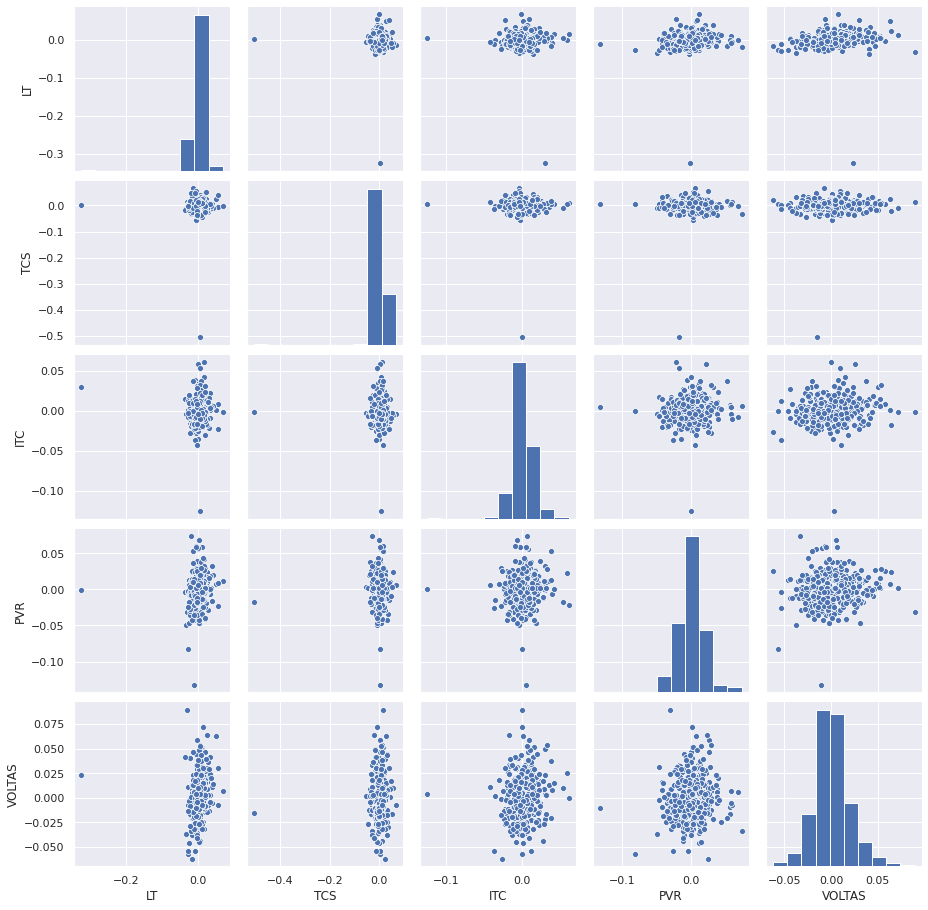

In [70]:
import seaborn as sns

sns.set(color_codes=True)
sns.pairplot(pct_change_dataFrame)

In [71]:
import matplotlib.pyplot as plt
rolling_avg_LT = pct_change_dataFrame['LT'].rolling(7).mean()
rolling_avg_LT

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
489    0.000646
490    0.000570
491   -0.000161
492    0.000754
493   -0.004316
Name: LT, Length: 494, dtype: float64

In [72]:
stand_LT = rolling_avg_LT.fillna(0).std()
stand_LT

0.00716376570367543

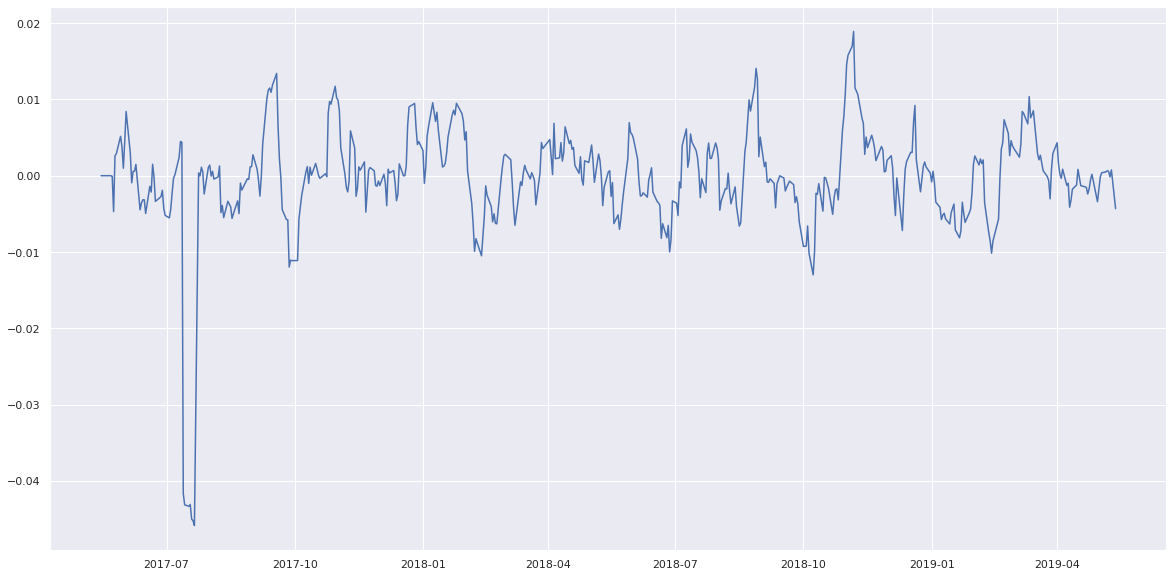

In [74]:
import pandas as pd
crrDate = pd.to_datetime(filter_LT['Date'])
crrLis = crrDate.tolist()
plt.figure(figsize=(20,10))
plt.plot(crrLis,rolling_avg_LT.fillna(0).tolist())
plt.show()

In [76]:
nif_load = pd.read_csv('Nifty50.csv')
nif_load

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...,...
489,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
490,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
491,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86
492,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19


<Figure size 1440x720 with 0 Axes>

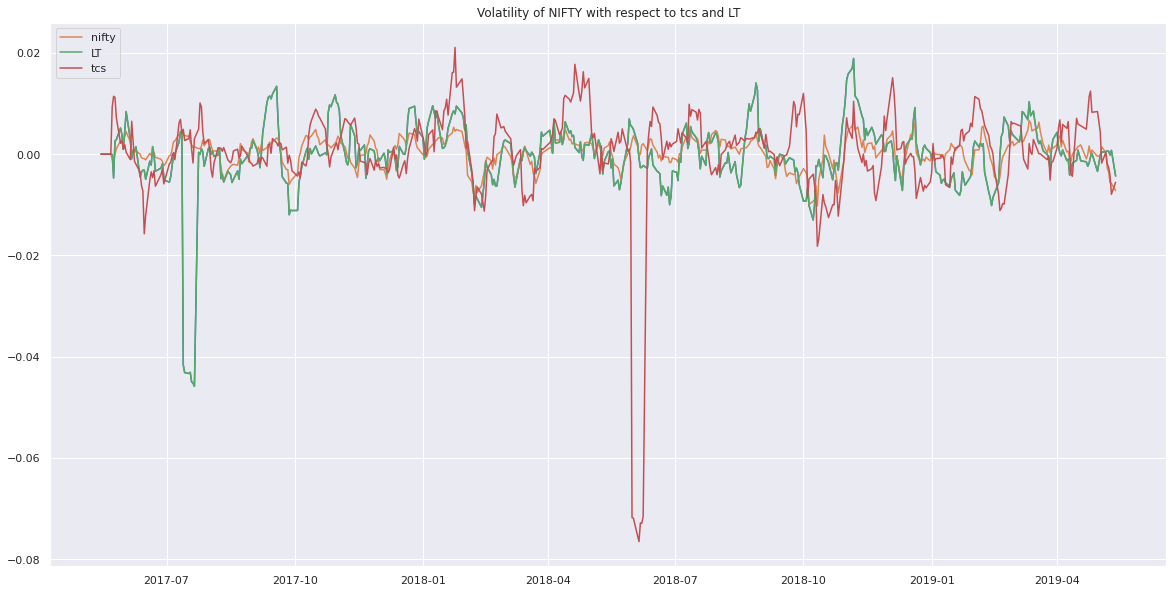

In [78]:
nif_close_price = nif_load['Close']
nif_change = nif_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nif_load['Date'])
nifDate = nifDate.tolist()
plt.figure(figsize=(20,10))

tcs_Date = pd.to_datetime(filter_tcs['Date'])
tcsLis = tcs_Date.tolist()
tcs_close_price = filter_tcs['Close Price']
tcs_change = tcs_close_price.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize=(20,10))
plt.plot(tcsLis,rolling_avg_LT.fillna(0).tolist())

plt.title("Volatility of NIFTY with respect to tcs and LT")
plt.plot(nifDate,nif_change.tolist(),label = 'nifty')
plt.plot(crrLis,rolling_avg_LT.fillna(0).tolist(),label = 'LT')
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

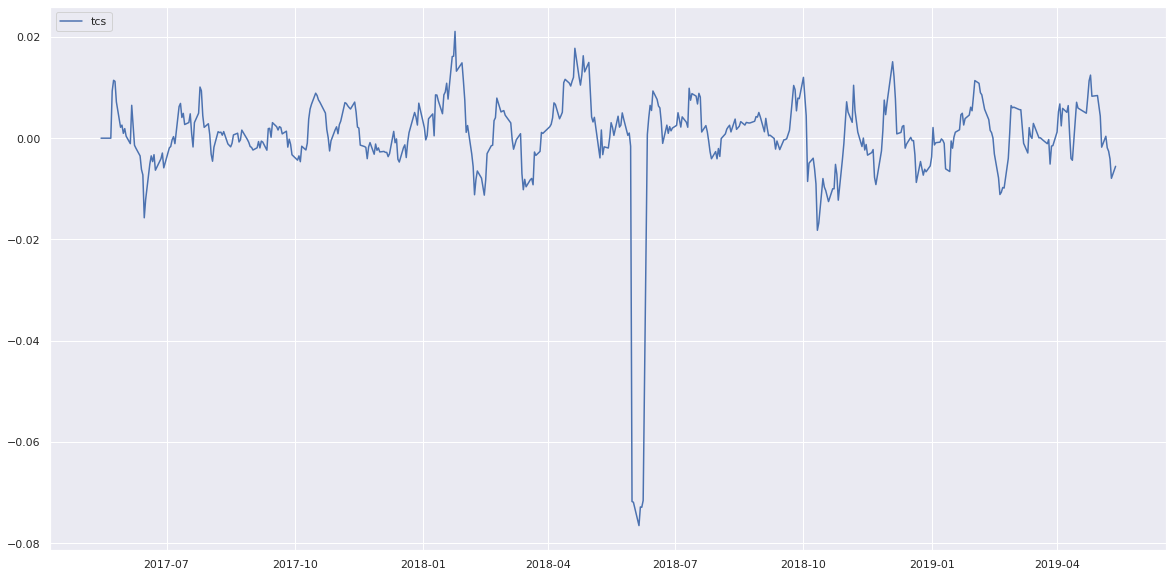

In [79]:
plt.figure(figsize=(20,10))
plt.plot(tcsLis,tcs_change,label = 'tcs')
plt.legend(loc='upper left')
plt.show()

In [80]:
short_window = 21
long_window = 34

signals = pd.DataFrame(index=filter_tcs.index)
signals['signal'] = 0.0

#SMA of Short Window
signals['short_mavg'] = filter_tcs['Close Price'].rolling(window=short_window, min_periods=1,center=False).mean()

#SMA of Long Window
signals['long_mavg'] = filter_tcs['Close Price'].rolling(window=long_window,min_periods=1, center=False).mean()

#Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0,0.0)

#Generate trading orders
signals['positions'] = signals['signal'].diff()
print(signals)


     signal   short_mavg    long_mavg  positions
0       0.0  2365.100000  2365.100000        NaN
1       0.0  2397.125000  2397.125000        0.0
2       0.0  2416.533333  2416.533333        0.0
3       0.0  2446.450000  2446.450000        0.0
4       0.0  2458.590000  2458.590000        0.0
..      ...          ...          ...        ...
493     1.0  2124.990476  2081.357353        0.0
494     1.0  2128.492857  2086.223529        0.0
495     1.0  2136.019048  2090.123529        0.0
496     1.0  2140.185714  2093.447059        0.0
497     1.0  2142.947619  2096.563235        0.0

[494 rows x 4 columns]


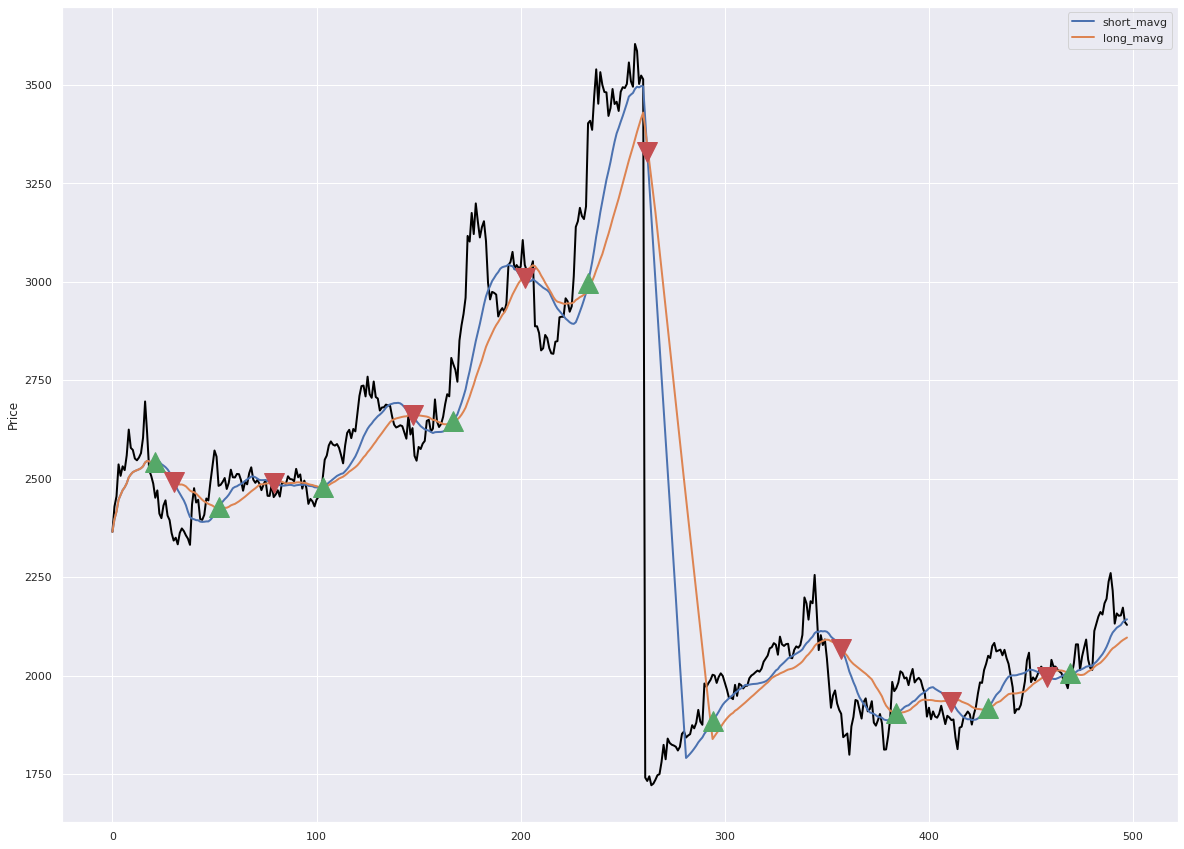

In [81]:
fig = plt.figure(figsize=(20,15))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price')

#Plot the closing price
filter_tcs['Close Price'].plot(ax=ax1, color='black', lw=2.)

#plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^' , markersize=20,color='g')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v' , markersize=20,color='r')

plt.show()

ValueError: ignored

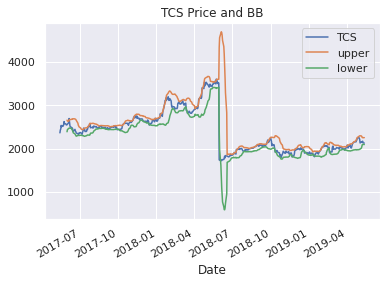

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'TCS'

# read csv file, use date as index and read close as a column
df = pd.read_csv('TCS.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()

In [0]:
data.to_csv('Module2Solutions.csv')